In [2]:
# # Link to upload the fifrom google.colab import drive
# from google.colab import drive
# drive.mount('/content/drive')



In [3]:
import pandas as pd
import numpy as np
#from google.colab import files
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


# Installation


In [4]:
# # f you running first time first install this
# !pip uninstall -y numpy pmdarima
# !pip install numpy==1.24.4 pmdarima==2.0.4


# Data Loading

In [5]:

#df = pd.read_csv("/content/drive/MyDrive/data/raw/area_production_yield_data.csv")
df = pd.read_csv("../data/raw/area_production_yield_data.csv")

print(df.columns)
df.head()

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


# Data Cleaning
Handling duplicates, missing values, NaNs values(in crops)

Delete duplicates- Unecessary repeating values

Handling NaNs values- replace NaNs values with 0 otherwise it can can create probles while exploratory data analysis (it misbehave like data pype not matching etc)

Handling Missing values- Remove the row if any of the following "state_name", "dist_name", "year" is  mising in row.



In [6]:
print(df.select_dtypes(include=[np.number])[(df.select_dtypes(include=[np.number]) < 0).any(axis=1)])
 # Negative values check


       Dist Code  Year  State Code  RICE AREA (1000 ha)  \
0              1  1966          14               548.00   
1              1  1967          14               547.00   
2              1  1968          14               556.30   
52             2  1966          14               406.00   
53             2  1967          14               414.00   
...          ...   ...         ...                  ...   
16115        917  1985          15               340.15   
16116        917  1986          15               334.22   
16117        917  1987          15               327.81   
16118        917  1988          15               318.65   
16119        917  1989          15               335.59   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
0                           185.00                  337.59   
1                           409.00                  747.71   
2                           468.00                  841.27   
52                          261.00         

In [7]:
import numpy as np

# Replace all -1.0 values with np.nan
df.replace(-1.0, np.nan, inplace=True)


In [8]:

# Negative values check

print(df.select_dtypes(include=[np.number])[(df.select_dtypes(include=[np.number]) < 0).any(axis=1)])


Empty DataFrame
Columns: [Dist Code, Year, State Code, RICE AREA (1000 ha), RICE PRODUCTION (1000 tons), RICE YIELD (Kg per ha), WHEAT AREA (1000 ha), WHEAT PRODUCTION (1000 tons), WHEAT YIELD (Kg per ha), KHARIF SORGHUM AREA (1000 ha), KHARIF SORGHUM PRODUCTION (1000 tons), KHARIF SORGHUM YIELD (Kg per ha), RABI SORGHUM AREA (1000 ha), RABI SORGHUM PRODUCTION (1000 tons), RABI SORGHUM YIELD (Kg per ha), SORGHUM AREA (1000 ha), SORGHUM PRODUCTION (1000 tons), SORGHUM YIELD (Kg per ha), PEARL MILLET AREA (1000 ha), PEARL MILLET PRODUCTION (1000 tons), PEARL MILLET YIELD (Kg per ha), MAIZE AREA (1000 ha), MAIZE PRODUCTION (1000 tons), MAIZE YIELD (Kg per ha), FINGER MILLET AREA (1000 ha), FINGER MILLET PRODUCTION (1000 tons), FINGER MILLET YIELD (Kg per ha), BARLEY AREA (1000 ha), BARLEY PRODUCTION (1000 tons), BARLEY YIELD (Kg per ha), CHICKPEA AREA (1000 ha), CHICKPEA PRODUCTION (1000 tons), CHICKPEA YIELD (Kg per ha), PIGEONPEA AREA (1000 ha), PIGEONPEA PRODUCTION (1000 tons), PIGEONP

In [9]:
# Step 1: Drop duplicates
df = df.drop_duplicates()

# Step 2: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 3: Handle missing values
# Drop rows missing essential identifiers
df = df.dropna(subset=["state_name", "dist_name", "year"])

# Fill NaNs in crop data with 0 (means no cultivation that year)
crop_cols = [col for col in df.columns if any(keyword in col for keyword in ['area', 'production', 'yield'])]
df[crop_cols] = df[crop_cols].fillna(0)

# Step 4: Convert datatypes
df["year"] = df["year"].astype(int)
df["state_name"] = df["state_name"].str.strip().str.lower()
df["dist_name"] = df["dist_name"].str.strip().str.lower()

# Step 5: (Optional) Filter out zero or unrealistic yields
for col in df.columns:
    if "yield" in col:
        df = df[df[col] >= 0]

# Step 6: Reset index
df = df.reset_index(drop=True)

# Done!
print("Preprocessed data shape:", df.shape)
df.head(5)


Preprocessed data shape: (16146, 80)


,dist_code,year,state_code,state_name,dist_name,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha),wheat_area_(1000_ha),wheat_production_(1000_tons),...,sugarcane_yield_(kg_per_ha),cotton_area_(1000_ha),cotton_production_(1000_tons),cotton_yield_(kg_per_ha),fruits_area_(1000_ha),vegetables_area_(1000_ha),fruits_and_vegetables_area_(1000_ha),potatoes_area_(1000_ha),onion_area_(1000_ha),fodder_area_(1000_ha)
0,1,1966,14,chhattisgarh,durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,chhattisgarh,durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,chhattisgarh,durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,chhattisgarh,durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,chhattisgarh,durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [10]:
df.describe()

,dist_code,year,state_code,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha),wheat_area_(1000_ha),wheat_production_(1000_tons),wheat_yield_(kg_per_ha),kharif_sorghum_area_(1000_ha),...,sugarcane_yield_(kg_per_ha),cotton_area_(1000_ha),cotton_production_(1000_tons),cotton_yield_(kg_per_ha),fruits_area_(1000_ha),vegetables_area_(1000_ha),fruits_and_vegetables_area_(1000_ha),potatoes_area_(1000_ha),onion_area_(1000_ha),fodder_area_(1000_ha)
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,...,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.594554,224.890927,1486.926146,77.060113,182.014913,1492.422027,22.634745,...,4500.167986,28.019296,7.229845,124.645753,7.771969,11.104149,18.695652,3.179144,1.214237,21.605264
std,278.309125,15.011185,4.988538,160.077726,326.628888,956.183161,100.392804,348.833120,1081.252374,45.061442,...,3153.949119,74.239292,25.041941,207.680587,13.578065,17.991725,25.868660,8.028544,4.277250,60.042403
min,1.000000,1966.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000,1.770000,2.000000,750.000000,0.000000,...,2000.000000,0.000000,0.000000,0.000000,0.310000,1.600000,2.520000,0.000000,0.060000,0.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000,36.800000,42.700000,1347.450000,2.050000,...,4502.210000,0.050000,0.000000,0.000000,2.220000,4.740000,8.945000,0.390000,0.280000,1.200000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500,123.000000,215.192500,2131.580000,20.900000,...,6704.605000,10.097500,2.000000,202.270000,8.790000,12.510000,23.570000,3.150000,0.880000,16.762500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.300000,800.890000,376.610000,5000.000000,159.540000,200.060000,240.990000,111.610000,131.350000,1162.660000


# Standardization Of The names of columns and rows

In [11]:
# List of crops to keep
crops = ['rice', 'wheat', 'groundnut', 'sunflower', 'soyabean',
         'oilseeds', 'sugarcane', 'cotton']

# Build list of relevant columns (area, production, yield for each crop)
target_cols = ['state_name', 'dist_name', 'year']
for crop in crops:
    for metric in ['area', 'production', 'yield']:
        col_name = f'{crop}_{metric}_(1000_ha)' if metric == 'area' else \
                   f'{crop}_{metric}_(1000_tons)' if metric == 'production' else \
                   f'{crop}_{metric}_(kg_per_ha)'
        # fix for "fruits and vegetables"
        col_name = col_name.replace('fruits_and_vegetables', 'fruits_and_vegetables')
        # check if column exists in df
        matched_cols = [col for col in df.columns if crop in col and metric in col]
        target_cols += matched_cols

# Drop duplicates and clean data
df = df.drop_duplicates()
df = df[target_cols]
df = df.fillna(0)
df_clean=df.copy()
# Final check
print("Filtered dataset shape:", df.shape)
df_clean.head(3)


Filtered dataset shape: (16146, 27)


,state_name,dist_name,year,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha),wheat_area_(1000_ha),wheat_production_(1000_tons),wheat_yield_(kg_per_ha),groundnut_area_(1000_ha),...,soyabean_yield_(kg_per_ha),oilseeds_area_(1000_ha),oilseeds_production_(1000_tons),oilseeds_yield_(kg_per_ha),sugarcane_area_(1000_ha),sugarcane_production_(1000_tons),sugarcane_yield_(kg_per_ha),cotton_area_(1000_ha),cotton_production_(1000_tons),cotton_yield_(kg_per_ha)
0,chhattisgarh,durg,1966,548.0,185.0,337.59,44.0,20.0,454.55,0.2,...,0.0,50.70,0.0,0.0,0.9,1.6,1777.78,0.0,0.0,0.0
1,chhattisgarh,durg,1967,547.0,409.0,747.71,50.0,26.0,520.00,0.1,...,0.0,113.55,0.0,0.0,0.8,1.2,1500.00,0.0,0.0,0.0
2,chhattisgarh,durg,1968,556.3,468.0,841.27,53.7,30.0,558.66,0.1,...,0.0,126.62,0.0,0.0,1.0,1.0,1000.00,0.0,0.0,0.0


In [12]:
# # Download the merge data
# df_clean.to_csv("df_clean.csv", index=False)

# from google.colab import files
# files.download('df_clean.csv')

Updated version of the above shell, so that it works on docker/other plateforms

In [13]:
import os
# Create the directory if it doesn't exist
os.makedirs("../data/cleaned", exist_ok=True)
# Save the cleaned data to a CSV file
df_clean.to_csv("../data/cleaned/area_production_yield_data_clean.csv", index=False)

print("File saved as area_production_yield_data_clean.csv in the current working directory.")


File saved as area_production_yield_data_clean.csv in the current working directory.


# Monthly Rainfall data Cleaning

In [14]:
#df_month_rain = pd.read_csv("/content/drive/MyDrive/data/raw/monthly_rainfall_data.csv")
df_month_rain = pd.read_csv("../data/raw/monthly_rainfall_data.csv")
# print(df_month_rain.head())
print(df_month_rain.columns)
df_month_rain.head()

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'JANUARY RAINFALL (Millimeters)', 'FEBRUARY RAINFALL (Millimeters)',
       'MARCH RAINFALL (Millimeters)', 'APRIL RAINFALL (Millimeters)',
       'MAY RAINFALL (Millimeters)', 'JUNE RAINFALL (Millimeters)',
       'JULY RAINFALL (Millimeters)', 'AUGUST RAINFALL (Millimeters)',
       'SEPTEMBER RAINFALL (Millimeters)', 'OCTOBER RAINFALL (Millimeters)',
       'NOVEMBER RAINFALL (Millimeters)', 'DECEMBER RAINFALL (Millimeters)',
       'ANNUAL RAINFALL (Millimeters)'],
      dtype='object')


,Dist Code,Year,State Code,State Name,Dist Name,JANUARY RAINFALL (Millimeters),FEBRUARY RAINFALL (Millimeters),MARCH RAINFALL (Millimeters),APRIL RAINFALL (Millimeters),MAY RAINFALL (Millimeters),JUNE RAINFALL (Millimeters),JULY RAINFALL (Millimeters),AUGUST RAINFALL (Millimeters),SEPTEMBER RAINFALL (Millimeters),OCTOBER RAINFALL (Millimeters),NOVEMBER RAINFALL (Millimeters),DECEMBER RAINFALL (Millimeters),ANNUAL RAINFALL (Millimeters)
0,1,1966,14,Chhattisgarh,Durg,1.4,0.0,0.0,8.9,38.6,169.5,249.5,182.6,112.6,4.8,0.9,1.0,769.8
1,1,1967,14,Chhattisgarh,Durg,0.1,0.0,73.4,0.6,0.0,237.5,342.9,428.8,142.8,3.3,0.0,34.2,1263.5
2,1,1968,14,Chhattisgarh,Durg,27.8,11.3,13.5,17.6,1.4,229.1,410.4,156.4,256.6,39.3,0.0,9.1,1172.3
3,1,1969,14,Chhattisgarh,Durg,0.6,0.0,0.0,15.3,16.5,98.3,375.8,239.1,180.9,2.5,0.0,0.0,929.0
4,1,1970,14,Chhattisgarh,Durg,8.3,7.9,32.9,0.2,2.3,317.2,535.9,410.9,139.0,29.7,0.0,0.0,1484.3


In [15]:


print(df_month_rain.select_dtypes(include=[np.number])[(df_month_rain.select_dtypes(include=[np.number]) < 0).any(axis=1)])


       Dist Code  Year  State Code  JANUARY RAINFALL (Millimeters)  \
23             1  1989          14                             0.0   
26             1  1992          14                             0.0   
27             1  1993          14                             0.0   
34             1  2002          14                            -1.0   
73             2  1992          14                             0.7   
...          ...   ...         ...                             ...   
14481        917  1996          15                            -1.0   
14482        917  1997          15                            -1.0   
14483        917  1998          15                            -1.0   
14484        917  1999          15                            -1.0   
14522        999  2011          11                            11.8   

       FEBRUARY RAINFALL (Millimeters)  MARCH RAINFALL (Millimeters)  \
23                                 0.0                           1.0   
26             

In [16]:
df_month_rain.replace(-1.0, np.nan, inplace=True)

In [17]:
print(df_month_rain.select_dtypes(include=[np.number])[(df_month_rain.select_dtypes(include=[np.number]) < 0).any(axis=1)])


Empty DataFrame
Columns: [Dist Code, Year, State Code, JANUARY RAINFALL (Millimeters), FEBRUARY RAINFALL (Millimeters), MARCH RAINFALL (Millimeters), APRIL RAINFALL (Millimeters), MAY RAINFALL (Millimeters), JUNE RAINFALL (Millimeters), JULY RAINFALL (Millimeters), AUGUST RAINFALL (Millimeters), SEPTEMBER RAINFALL (Millimeters), OCTOBER RAINFALL (Millimeters), NOVEMBER RAINFALL (Millimeters), DECEMBER RAINFALL (Millimeters), ANNUAL RAINFALL (Millimeters)]
Index: []


In [18]:
import pandas as pd

# Make a copy for cleaning
df_month_rain = df_month_rain.copy()

# Step 1: Clean column names
df_month_rain.columns = (
    df_month_rain.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

# Step 2: Convert rainfall columns to numeric
rainfall_columns = [col for col in df_month_rain.columns if 'rainfall' in col]
df_month_rain[rainfall_columns] = df_month_rain[rainfall_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Drop rows with missing rainfall data
df_month_rain.dropna(subset=rainfall_columns, inplace=True)

# Step 4: Feature Engineering- monsoon_rainfall(June to october)
df_month_rain['monsoon_rainfall_millimeters'] = df_month_rain[[
    'june_rainfall_millimeters',
    'july_rainfall_millimeters',
    'august_rainfall_millimeters',
    'september_rainfall_millimeters',
    'october_rainfall_millimeters'  # Including October rainfall
]].sum(axis=1)
# Step 4: Convert datatypes
# Drop rows where year is missing
df_month_rain = df_month_rain.dropna(subset=['year'])

df_month_rain["year"] = df_month_rain["year"].astype(int)

df_month_rain["state_name"] = df_month_rain["state_name"].str.strip().str.lower()
df_month_rain["dist_name"] = df_month_rain["dist_name"].str.strip().str.lower()

# View cleaned data

df_month_rain.head()


,dist_code,year,state_code,state_name,dist_name,january_rainfall_millimeters,february_rainfall_millimeters,march_rainfall_millimeters,april_rainfall_millimeters,may_rainfall_millimeters,june_rainfall_millimeters,july_rainfall_millimeters,august_rainfall_millimeters,september_rainfall_millimeters,october_rainfall_millimeters,november_rainfall_millimeters,december_rainfall_millimeters,annual_rainfall_millimeters,monsoon_rainfall_millimeters
0,1,1966,14,chhattisgarh,durg,1.4,0.0,0.0,8.9,38.6,169.5,249.5,182.6,112.6,4.8,0.9,1.0,769.8,719.0
1,1,1967,14,chhattisgarh,durg,0.1,0.0,73.4,0.6,0.0,237.5,342.9,428.8,142.8,3.3,0.0,34.2,1263.5,1155.3
2,1,1968,14,chhattisgarh,durg,27.8,11.3,13.5,17.6,1.4,229.1,410.4,156.4,256.6,39.3,0.0,9.1,1172.3,1091.8
3,1,1969,14,chhattisgarh,durg,0.6,0.0,0.0,15.3,16.5,98.3,375.8,239.1,180.9,2.5,0.0,0.0,929.0,896.6
4,1,1970,14,chhattisgarh,durg,8.3,7.9,32.9,0.2,2.3,317.2,535.9,410.9,139.0,29.7,0.0,0.0,1484.3,1432.7


In [19]:
# # Download the merge data
# df_month_rain.to_csv("df_month_rain.csv", index=False)

# from google.colab import files
# files.download('df_month_rain.csv')

Updated version of the above shell, so that it works on docker/other plateforms

In [20]:
# Create the directory if it doesn't exist
os.makedirs("../data/cleaned", exist_ok=True)
# Save the cleaned data to a CSV file
df_month_rain.to_csv("../data/cleaned/monthly_rainfall_data_clean.csv", index=False)

print("File saved as monthly_rainfall_data_clean.csv in the current working directory.")


File saved as monthly_rainfall_data_clean.csv in the current working directory.


In [21]:
df_month_rain.describe()

,dist_code,year,state_code,january_rainfall_millimeters,february_rainfall_millimeters,march_rainfall_millimeters,april_rainfall_millimeters,may_rainfall_millimeters,june_rainfall_millimeters,july_rainfall_millimeters,august_rainfall_millimeters,september_rainfall_millimeters,october_rainfall_millimeters,november_rainfall_millimeters,december_rainfall_millimeters,annual_rainfall_millimeters,monsoon_rainfall_millimeters
count,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000,13921.000000
mean,266.374470,1990.545650,9.517635,12.937763,16.077933,18.844810,27.150966,50.596035,166.222247,289.666281,261.605244,163.469665,71.811314,29.479592,13.130192,1120.737095,952.774750
std,275.902287,14.564017,5.061163,27.669855,34.326574,43.303125,54.428446,89.698735,190.220947,235.176267,187.985311,132.719805,103.849754,70.163950,35.482299,721.087197,629.433836
min,1.000000,1966.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,77.000000,1978.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.800000,50.000000,135.500000,129.600000,68.500000,3.300000,0.000000,0.000000,666.800000,551.700000
50%,152.000000,1990.000000,9.000000,1.800000,2.200000,2.900000,5.800000,17.400000,105.000000,239.300000,227.400000,135.800000,31.600000,1.200000,0.100000,947.400000,815.100000
75%,241.000000,2003.000000,12.000000,14.700000,17.900000,19.500000,28.400000,58.600000,206.000000,370.100000,350.600000,224.400000,103.800000,23.000000,9.600000,1343.800000,1165.500000
max,999.000000,2015.000000,20.000000,554.800000,586.900000,1170.000000,986.800000,2083.000000,1650.900000,2266.100000,2409.500000,1400.000000,3533.000000,1061.300000,762.600000,8409.000000,5731.300000


# Merging The data df and df_month_rain

In [22]:
# Merge using all columns from df_month_rain
df_merged = pd.merge(
    df_clean,
    df_month_rain,  # include all columns
    on=['state_name', 'dist_name', 'year'],
    how='inner'  # use 'left' if you want to keep all rows from df (crop data)
)

# Preview merged DataFrame
print("Merged DataFrame shape:", df_merged.shape)
df_merged.head()

Merged DataFrame shape: (13879, 43)


,state_name,dist_name,year,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha),wheat_area_(1000_ha),wheat_production_(1000_tons),wheat_yield_(kg_per_ha),groundnut_area_(1000_ha),...,may_rainfall_millimeters,june_rainfall_millimeters,july_rainfall_millimeters,august_rainfall_millimeters,september_rainfall_millimeters,october_rainfall_millimeters,november_rainfall_millimeters,december_rainfall_millimeters,annual_rainfall_millimeters,monsoon_rainfall_millimeters
0,chhattisgarh,durg,1966,548.0,185.0,337.59,44.0,20.0,454.55,0.2,...,38.6,169.5,249.5,182.6,112.6,4.8,0.9,1.0,769.8,719.0
1,chhattisgarh,durg,1967,547.0,409.0,747.71,50.0,26.0,520.00,0.1,...,0.0,237.5,342.9,428.8,142.8,3.3,0.0,34.2,1263.5,1155.3
2,chhattisgarh,durg,1968,556.3,468.0,841.27,53.7,30.0,558.66,0.1,...,1.4,229.1,410.4,156.4,256.6,39.3,0.0,9.1,1172.3,1091.8
3,chhattisgarh,durg,1969,563.4,400.8,711.40,49.4,26.5,536.44,0.1,...,16.5,98.3,375.8,239.1,180.9,2.5,0.0,0.0,929.0,896.6
4,chhattisgarh,durg,1970,571.6,473.6,828.55,44.2,29.0,656.11,0.1,...,2.3,317.2,535.9,410.9,139.0,29.7,0.0,0.0,1484.3,1432.7


In [23]:
filtered = df[
    (df['state_name'] == 'chhattisgarh') &
    (df['dist_name'] == 'raipur') &
    (df['rice_yield_(kg_per_ha)'].notna())
]
print(f"Available data points: {len(filtered)}")


Available data points: 52


# Merge Data

In [24]:
# # Download the merge data
# df_merged.to_csv('merged_data.csv', index=False)
# from google.colab import files
# files.download('merged_data.csv')

Updated version of the above shell, so that it works on docker/other plateforms

In [25]:
# Create the directory if it doesn't exist
os.makedirs("../data/cleaned", exist_ok=True)
# Save the cleaned data to a CSV file
df_merged.to_csv("../data/cleaned/merged_data.csv", index=False)

print("File saved as merged_data.csv in the current working directory.")


File saved as merged_data.csv in the current working directory.


In [26]:
# Ensure common keys are cleaned and in the same format (already done in your earlier steps)

# Merge on state, district, and year
df_merged_ann_rainfall = pd.merge(df, df_month_rain[['state_name', 'dist_name', 'year', 'annual_rainfall_millimeters']],
                     on=['state_name', 'dist_name', 'year'],
                     how='inner')

# Check the shape and preview
print("Merged DataFrame shape:", df_merged_ann_rainfall.shape)
df_merged_ann_rainfall.head()


Merged DataFrame shape: (13879, 28)


,state_name,dist_name,year,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha),wheat_area_(1000_ha),wheat_production_(1000_tons),wheat_yield_(kg_per_ha),groundnut_area_(1000_ha),...,oilseeds_area_(1000_ha),oilseeds_production_(1000_tons),oilseeds_yield_(kg_per_ha),sugarcane_area_(1000_ha),sugarcane_production_(1000_tons),sugarcane_yield_(kg_per_ha),cotton_area_(1000_ha),cotton_production_(1000_tons),cotton_yield_(kg_per_ha),annual_rainfall_millimeters
0,chhattisgarh,durg,1966,548.0,185.0,337.59,44.0,20.0,454.55,0.2,...,50.70,0.0,0.00,0.9,1.6,1777.78,0.0,0.0,0.0,769.8
1,chhattisgarh,durg,1967,547.0,409.0,747.71,50.0,26.0,520.00,0.1,...,113.55,0.0,0.00,0.8,1.2,1500.00,0.0,0.0,0.0,1263.5
2,chhattisgarh,durg,1968,556.3,468.0,841.27,53.7,30.0,558.66,0.1,...,126.62,0.0,0.00,1.0,1.0,1000.00,0.0,0.0,0.0,1172.3
3,chhattisgarh,durg,1969,563.4,400.8,711.40,49.4,26.5,536.44,0.1,...,114.14,14.9,130.54,1.0,1.9,1900.00,0.0,0.0,0.0,929.0
4,chhattisgarh,durg,1970,571.6,473.6,828.55,44.2,29.0,656.11,0.1,...,126.40,24.3,192.25,0.7,1.4,2000.00,0.0,0.0,0.0,1484.3


# Rice Related columns and its monsoon rain fall

In [27]:
# Filter only rice-related columns + location, year, and monsoon_rainfall
rice_columns = [col for col in df_merged.columns if 'rice' in col]
final_columns = ['state_name', 'dist_name', 'year', 'monsoon_rainfall_millimeters'] + rice_columns

# Create a filtered dataframe
df_rice = df_merged[final_columns]

# View the result
print("Rice-only data with monsoon rainfall:")
print(df_rice.shape)
df_rice.head()


Rice-only data with monsoon rainfall:
(13879, 7)


,state_name,dist_name,year,monsoon_rainfall_millimeters,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha)
0,chhattisgarh,durg,1966,719.0,548.0,185.0,337.59
1,chhattisgarh,durg,1967,1155.3,547.0,409.0,747.71
2,chhattisgarh,durg,1968,1091.8,556.3,468.0,841.27
3,chhattisgarh,durg,1969,896.6,563.4,400.8,711.40
4,chhattisgarh,durg,1970,1432.7,571.6,473.6,828.55


# Downloading the Merged data

In [28]:
# # Save the filtered rice data to a CSV file
# df_rice.to_csv('rice_with_monsoon_rainfall.csv', index=False)

# print("File saved as 'rice_with_monsoon_rainfall.csv'")
# from google.colab import files
# files.download('rice_with_monsoon_rainfall.csv')


In [29]:
# Create the directory if it doesn't exist
os.makedirs("../data/cleaned", exist_ok=True)
# Save the cleaned data to a CSV file
df_rice.to_csv("../data/cleaned/rice_with_monsoon_rainfall.csv", index=False)

print("File saved as rice_with_monsoon_rainfall.csv in the current working directory.")


File saved as rice_with_monsoon_rainfall.csv in the current working directory.


# Scatter Plotting

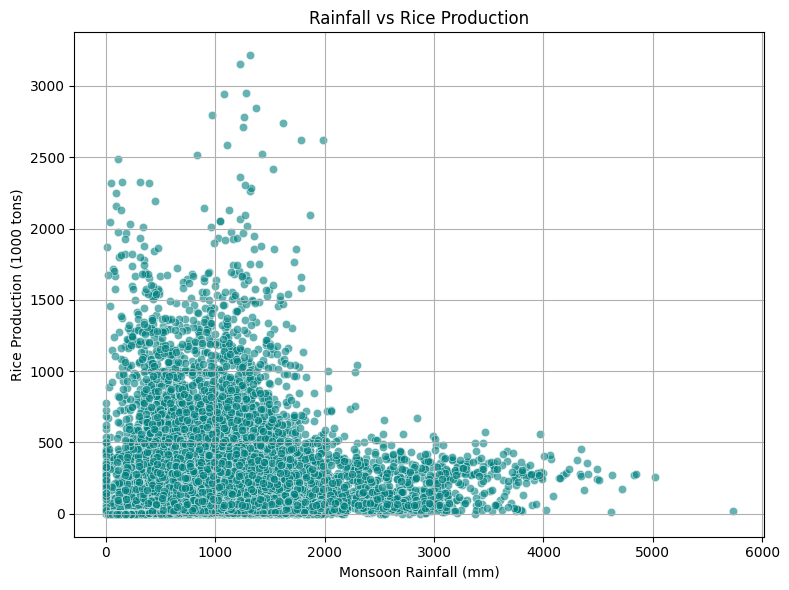

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the rice production column (just in case it's named differently)
rice_prod_col = [col for col in df_rice.columns if 'production' in col][0]  # e.g., 'rice_production_(1000_tons)'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_rice, x='monsoon_rainfall_millimeters', y=rice_prod_col, alpha=0.6, color='teal')
plt.title('Rainfall vs Rice Production')
plt.xlabel('Monsoon Rainfall (mm)')
plt.ylabel('Rice Production (1000 tons)')
plt.grid(True)
plt.tight_layout()
plt.show()


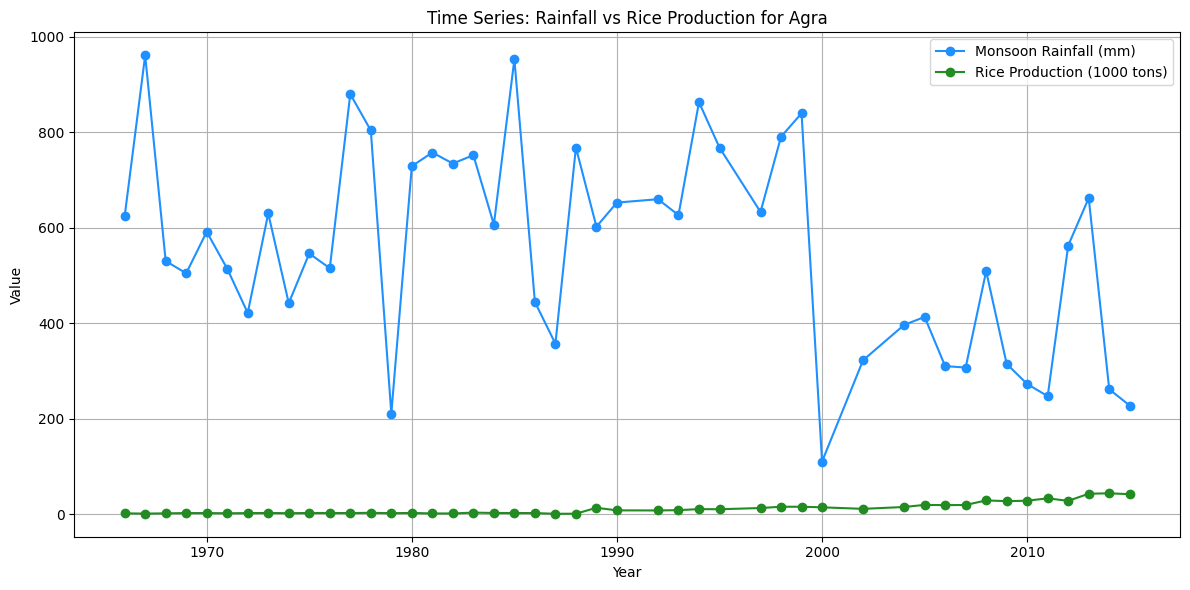

In [31]:
import matplotlib.pyplot as plt

# Choose a district (use one from the list you just printed)
district_name = 'agra'  # Replace with your district of interest

# Filter the data for that district
df_district = df_rice[df_rice['dist_name'] == district_name]

# Check if the filtered data exists
if df_district.empty:
    print(f"No data available for district: {district_name}")
else:
    # Plot Time Series for Rice Production and Monsoon Rainfall
    plt.figure(figsize=(12, 6))

    # Plot Rainfall and Rice Production on the same axis
    plt.plot(df_district['year'], df_district['monsoon_rainfall_millimeters'], label='Monsoon Rainfall (mm)', color='dodgerblue', marker='o')
    plt.plot(df_district['year'], df_district[rice_prod_col], label='Rice Production (1000 tons)', color='forestgreen', marker='o')

    plt.title(f'Time Series: Rainfall vs Rice Production for {district_name.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


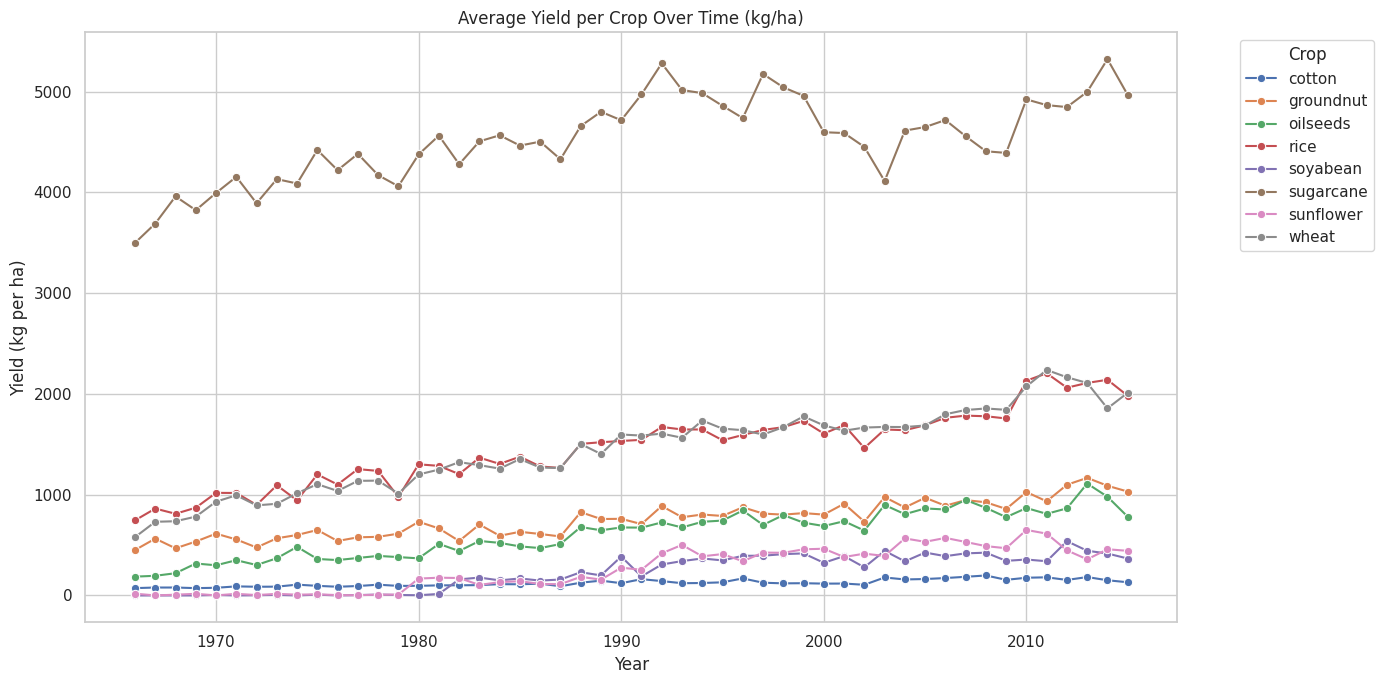

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df_merged.columns = df_merged.columns.str.strip().str.lower().str.replace(' ', '_')

# Define crops
crops = [
    'rice', 'wheat', 'groundnut', 'sunflower', 'soyabean',
    'oilseeds', 'sugarcane', 'cotton', 'fruits_and_vegetables',
    'potatoes', 'onion'
]

# Select relevant columns
target_cols = ['state_name', 'dist_name', 'year']
for crop in crops:
    for suffix in ['area_(1000_ha)', 'production_(1000_tons)', 'yield_(kg_per_ha)']:
        col = f"{crop}_{suffix}"
        if col in df_merged.columns:
            target_cols.append(col)

filtered_df_merged = df_merged[target_cols].drop_duplicates().fillna(0)

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Melt wide to long format for yield columns
yield_cols = [col for col in filtered_df_merged.columns if '_yield_' in col]
melted_df_merged = filtered_df_merged.melt(
    id_vars=['state_name', 'dist_name', 'year'],
    value_vars=yield_cols,
    var_name='crop_yield_type',
    value_name='yield_kg_per_ha'
)

# Extract crop name from column
melted_df_merged['crop'] = melted_df_merged['crop_yield_type'].str.extract(
    r'(rice|wheat|groundnut|sunflower|soyabean|oilseeds|sugarcane|cotton|fruits_and_vegetables|potatoes|onion)'
)

# Group and average
avg_yield_by_crop_year = melted_df_merged.groupby(['crop', 'year'])['yield_kg_per_ha'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_yield_by_crop_year, x='year', y='yield_kg_per_ha', hue='crop', marker='o')
plt.title('Average Yield per Crop Over Time (kg/ha)')
plt.xlabel('Year')
plt.ylabel('Yield (kg per ha)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Augmented Dickey-Fuller Test
The ADF test is used to check if a time series is stationary or not.

Why Stationarity needed?

- Most time series models (like ARIMA) require stationarity.

- A stationary series has constant mean and variance over time—this makes it predictable.

- A non-stationary series can have trends or seasonality, making it harder to model without transformations.

In [33]:
from statsmodels.tsa.stattools import adfuller

# Select and clean data
filtered = df[
    (df['state_name'] == 'chhattisgarh') &
    (df['dist_name'] == 'raipur') &
    (df['rice_yield_(kg_per_ha)'].notna())
]

if len(filtered) < 5:
    print("Error: Not enough data points")
else:
    series = filtered['rice_yield_(kg_per_ha)'].astype(float)
    result = adfuller(series, autolag='AIC')

    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f"ADF Statistic: {adf_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"\t{key}: {value:.4f}")

    # Interpretation
    if p_value < 0.05:
        print("\nConclusion: Reject null hypothesis - series is stationary")
    else:
        print("\nConclusion: Fail to reject null hypothesis - series is non-stationary")


ADF Statistic: -1.2136
p-value: 0.6677
Critical Values:
	1%: -3.5685
	5%: -2.9214
	10%: -2.5987

Conclusion: Fail to reject null hypothesis - series is non-stationary


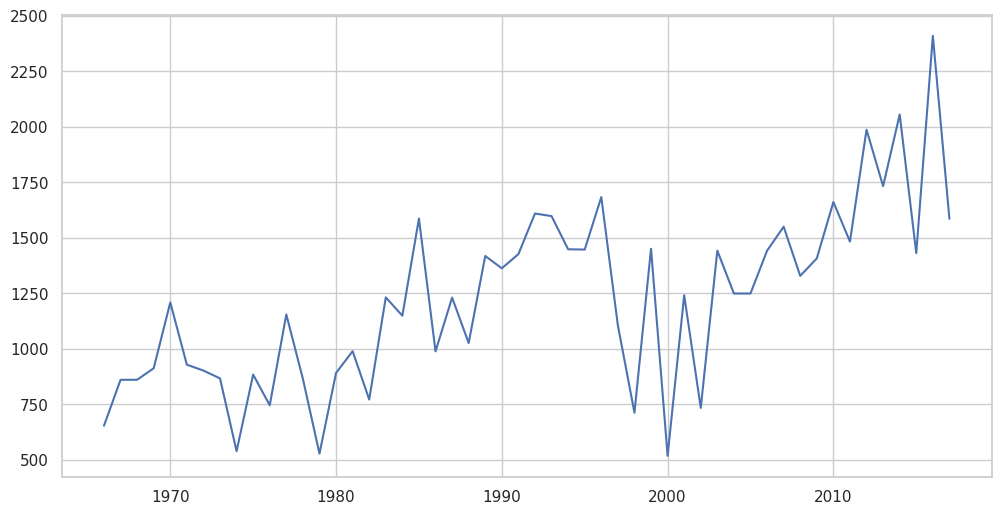

In [34]:
plt.plot(filtered['year'], filtered['rice_yield_(kg_per_ha)'])
plt.show()


# Trnasformation of data to make stationary

In [35]:

# Step 1: Clean and select data
filtered = df[
    (df['state_name'] == 'chhattisgarh') &
    (df['dist_name'] == 'raipur') &
    (df['rice_yield_(kg_per_ha)'].notna())
]

series = filtered['rice_yield_(kg_per_ha)'].astype(float)

# Step 2: Apply first-order differencing
diff_series = series.diff().dropna()

# Step 3: Run ADF test on differenced series
result = adfuller(diff_series, autolag='AIC')

# Step 4: Print results
print(f"ADF Statistic (Differenced): {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.4f}")

if result[1] < 0.05:
    print("\nConclusion: Differenced series is stationary")
else:
    print("\nConclusion: Differenced series is still non-stationary")


ADF Statistic (Differenced): -16.9493
p-value: 0.0000
Critical Values:
	1%: -3.5685
	5%: -2.9214
	10%: -2.5987

Conclusion: Differenced series is stationary


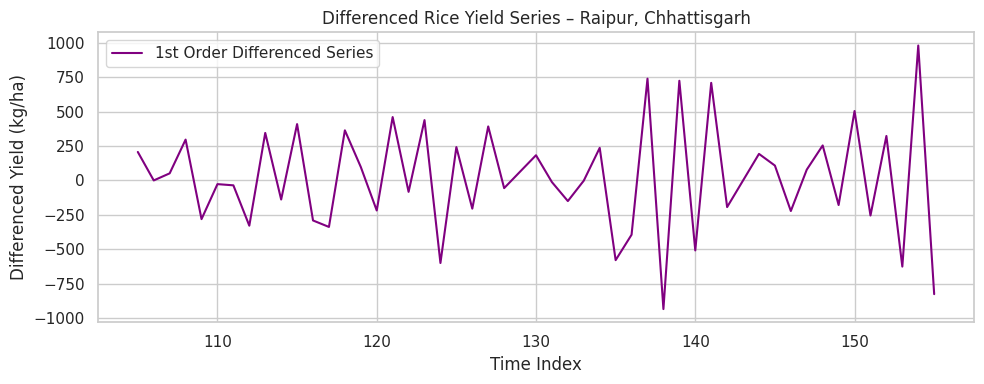

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(diff_series, label="1st Order Differenced Series", color='purple')
plt.title("Differenced Rice Yield Series – Raipur, Chhattisgarh")
plt.xlabel("Time Index")
plt.ylabel("Differenced Yield (kg/ha)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
from pmdarima import auto_arima

model = auto_arima(series, seasonal=False,
                   d=1,  # because we differenced once
                   trace=True, error_action='ignore', suppress_warnings=True)

print(model.summary())


Performing stepwise search to minimize aic


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=728.445, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=758.889, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=723.601, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731.843, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=756.997, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=724.587, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=724.477, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=722.790, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=724.065, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=724.043, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=732.138, Time=0.01 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=726.041, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.476 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -359.395
Date:                Sat, 26 Apr 2025   AIC                            722.790
Time:                        00:30:26   BIC                            726.653
Sample:                             0   HQIC                           724.266
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7371      0.096     -7.654      0.000      -0.926  

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


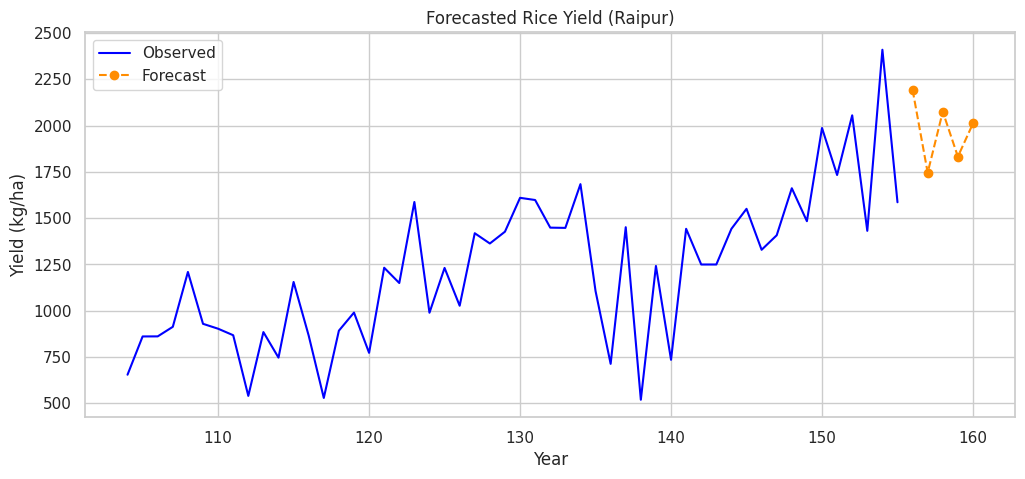

In [38]:
# Ensure your series index is datetime or year (e.g., series.index = pd.RangeIndex(1962, 2018))

# Number of future periods
n_periods = 5
forecast = model.predict(n_periods=n_periods)

# Fix the forecast index
last_year = series.index[-1]
forecast_index = pd.RangeIndex(start=last_year + 1, stop=last_year + 1 + n_periods)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(series.index, series, label='Observed', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='darkorange', linestyle='--', marker='o')
plt.title('Forecasted Rice Yield (Raipur)')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.legend()
plt.grid(True)
plt.show()


# Forcasting For Thiruvananthapuram Kerala

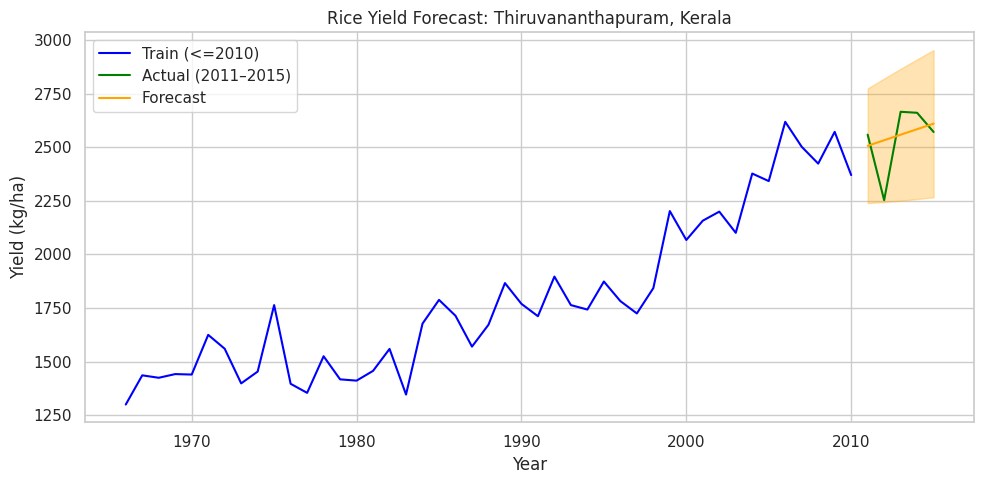

In [39]:

from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
#df = pd.read_csv("/content/merged_data.csv")
df = pd.read_csv("../data/cleaned/merged_data.csv")
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Filter only for Kerala, Thiruvananthapuram
df = df[
    (df['state_name'].str.lower() == 'kerala') &
    (df['dist_name'].str.lower() == 'thiruvananthapuram')
]

# Parameters
forecast_horizon = 5
cutoff_year = 2010
forecast_all = []

# Proceed only if data exists
if not df.empty:
    group = df.sort_values('year')
    group = group.dropna(subset=['rice_yield_(kg_per_ha)'])

    train_data = group[group['year'] <= cutoff_year]
    test_data = group[(group['year'] > cutoff_year) & (group['year'] <= cutoff_year + forecast_horizon)]

    if len(train_data) >= 5:
        series = train_data['rice_yield_(kg_per_ha)'].astype(float).reset_index(drop=True)

        try:
            model = auto_arima(series, d=1, seasonal=False, trace=False,
                               error_action='ignore', suppress_warnings=True)

            forecast, conf_int = model.predict(n_periods=forecast_horizon, return_conf_int=True)
            years = np.arange(cutoff_year + 1, cutoff_year + forecast_horizon + 1)

            for y, f, ci_low, ci_high in zip(years, forecast, conf_int[:, 0], conf_int[:, 1]):
                actual_val = test_data[test_data['year'] == y]['rice_yield_(kg_per_ha)'].values
                forecast_all.append({
                    'state_name': 'Kerala',
                    'dist_name': 'Thiruvananthapuram',
                    'year': y,
                    'forecast': f,
                    'ci_lower': ci_low,
                    'ci_upper': ci_high,
                    'actual': actual_val[0] if len(actual_val) > 0 else np.nan
                })

            # Plotting
            plt.figure(figsize=(10, 5))
            plt.plot(train_data['year'], train_data['rice_yield_(kg_per_ha)'], label="Train (<=2010)", color='blue')
            plt.plot(test_data['year'], test_data['rice_yield_(kg_per_ha)'], label="Actual (2011–2015)", color='green')
            plt.plot(years, forecast, label="Forecast", color='orange')
            plt.fill_between(years, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.3)
            plt.title("Rice Yield Forecast: Thiruvananthapuram, Kerala")
            plt.xlabel("Year")
            plt.ylabel("Yield (kg/ha)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Forecasting failed for Thiruvananthapuram, Kerala → {e}")
    else:
        print("Not enough data for training (minimum 5 years needed).")
else:
    print("No data found for Thiruvananthapuram, Kerala.")
